In [25]:
from ase.io.espresso import read_espresso_out, read_espresso_in
import os

path2relax = "/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/QE/SiO2/beta-tridymite__mp-559091/relax/relax_0"
with open(os.path.join(path2relax, "relax.out")) as f:
    atom_gen = read_espresso_out(f, index=slice(None))
    # 全atoms取得
    all_ase_atoms = []
    while True:
        try:
            ase_atoms = next(atom_gen)
            all_ase_atoms.append(ase_atoms)
        except StopIteration:
            break

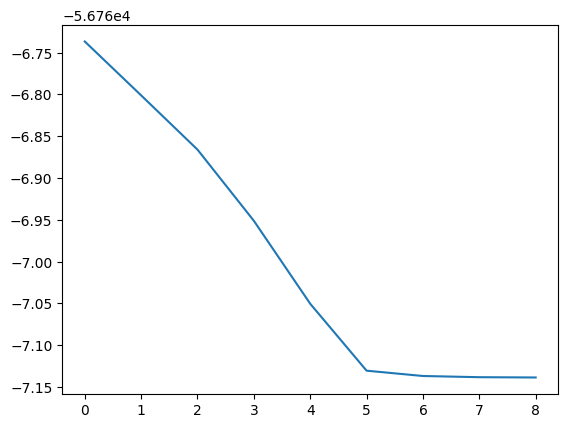

In [26]:
import matplotlib.pyplot as plt

energies = [atoms.get_potential_energy() for atoms in all_ase_atoms]
plt.plot(energies)

In [27]:
# ASE.atomsをMLPAtomsに変換
from mlptools.atoms.atom import MLPAtoms

In [28]:
import pickle


for i, atoms in enumerate(all_ase_atoms):
    mlpatoms = MLPAtoms(
        cell=atoms.cell[:],
        coord=atoms.positions,
        energy=atoms.get_potential_energy(),
        force=atoms.get_forces(),
        n_atoms=atoms.get_global_number_of_atoms(),
        total_magnetization=None,
        structure_id="mp-559091",
        symbols=atoms.get_chemical_symbols(),
        ase_atoms=atoms,
    )
    pickle.dump(mlpatoms, open(os.path.join(path2relax, f"atoms_{i}.pkl"), "wb"))